### Иследование влияния подписки на свервис по прокату самокатов:
У нас в распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
- без подписки 
абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;


- с подпиской Ultra
абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.

#### Описание данных

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

#### Порядок действий:
* Загрузка данных
* Предобработка
* Иследовательский анализ
* Обьединенение данных
* Подсчет выручки
* Проверка Гипотез

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_user = pd.read_csv('/datasets/users_go.csv')
data_rider = pd.read_csv('/datasets/rides_go.csv')
data_subscript = pd.read_csv('/datasets/subscriptions_go.csv')
data_user.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Вывод: Первый файл обозначим как data_user, содержит в себе 5 колонок, пропуски в данных отсутствуют

In [4]:
data_rider.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
data_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Вывод: Второй файл обозначим как data_rider, содержит в себе 4 колонок, пропуски в данных отсутствуют, имеет столбец с даитой который необходимо привести к формату пандас

In [6]:
data_subscript.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
data_subscript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Вывод: Третий файл обозначим как data_subscript, содержит в себе 4 колоноки, пропуски в данных отсутствуют

#### Общий вывод по загрузке данных:
 Загруженно 3 файла, пропуски не обнаружены, в одном из файлов необходимо сменить тип данных колонки дата.

### Шаг 2. Предобработка данных

In [8]:
data_rider['date'] = pd.to_datetime(data_rider['date'], format = '%Y.%m.%d')
data_rider['month'] = pd.DatetimeIndex(data_rider['date']).month

Меняем тип данных колонки date, на тип pandas, добовляем отдельную колнку месяц

In [9]:
data_user[data_user.duplicated ()].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

In [10]:
data_user = data_user.drop_duplicates()

In [11]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


При проверки были обноружены дубликаты в дс data_user в обьеме 31 шт, в последующем были удалены.

In [12]:
data_rider[data_rider.duplicated()].count()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

#### Общий вывод по предобработке данных:
При проверки были обноружены дубликаты в дс data_user в обьеме 31 шт, в последующем были удалены.В колонка дата приведена в соответствие с  нужным форматом.

### Шаг 3. Исследовательский анализ данных

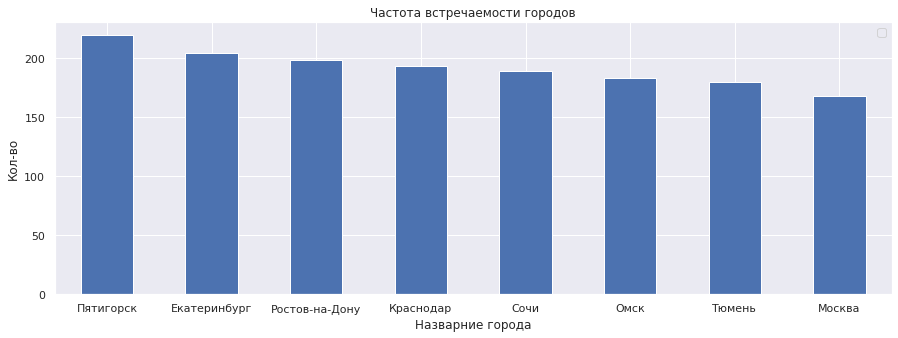

In [14]:
data_user['city'].value_counts().to_frame().reset_index().plot(kind='bar',
                                                               x="index",
                                                               y="city",
                                                               figsize=(15,5))
plt.xlabel('Назварние города')
plt.ylabel('Кол-во')
plt.title('Частота встречаемости городов')
plt.legend('')
plt.xticks(rotation=0)
plt.show()

Вывод: Сотношение пользователей примерно равно есть небольшие перекосы в сторону Пятигорска, Екатеринбурга, Краснодара. Наименьшее кол-во пользователей по отношению к другим городам это Москва.

3.2 соотношение пользователей с подпиской и без подписки;

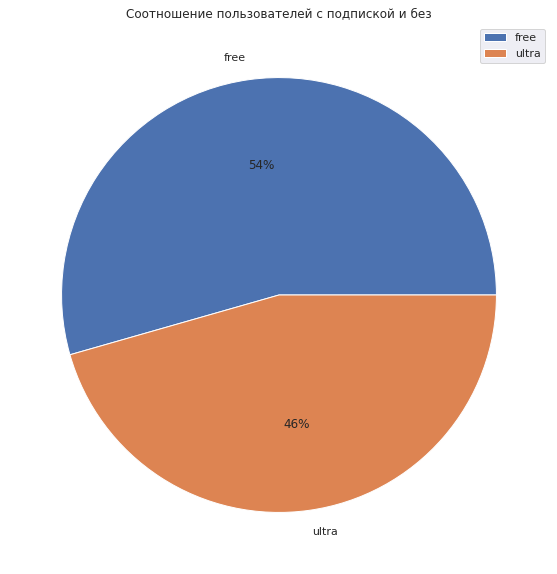

In [15]:
data_user.groupby(['subscription_type']).count().plot(kind='pie',
                                         y='user_id',
                                         autopct='%1.0f%%', 
                                         figsize=(10,10))
plt.title('Соотношение пользователей с подпиской и без')
plt.ylabel('')
plt.show()

Вывод: Пользователи без подписки доминируют над пользователями с подпиской на 8%.

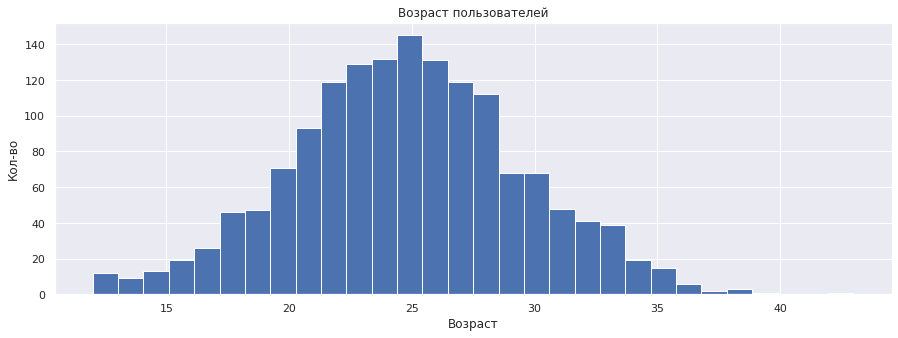

In [16]:
data_user['age'].hist(bins=30, figsize=(15,5))
plt.xlabel('Возраст')
plt.ylabel('Кол-во')
plt.title('Возраст пользователей')
plt.show()

In [17]:
data_user['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

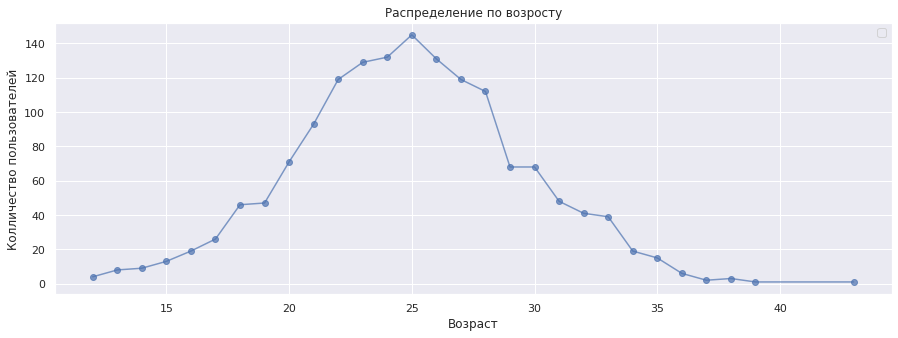

In [18]:
pd.pivot_table(data_user,
              index=['age'],
              values=['user_id'],
              aggfunc=len).plot(grid=True,
                               style='-o',
                               figsize=(15,5),
                               alpha=0.7)
plt.title('Распределение по возросту')
plt.xlabel('Возраст')
plt.legend('')
plt.ylabel('Колличество пользователей')
plt.show()

Вывод:

* Средний возраст пользователя составляет примерно 25 лет

* Минимальный возраст составил 12 лет

* Максимальный возраст сотсавил 43 года.

* Клиенты в возрасте от 22 лет до 28 лет являются ключейвой аудиторией сервса

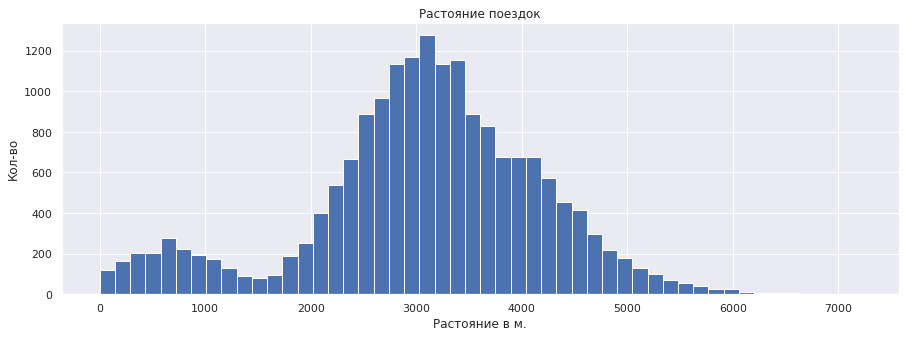

In [19]:
data_rider['distance'].hist(bins=50, figsize=(15,5))
plt.xlabel('Растояние в м.')
plt.ylabel('Кол-во')
plt.title('Растояние поездок')
plt.show()

In [20]:
data_rider['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Вывод:

* Среднее растояний каждой поездки составляет 3070м

* Минимальеная поездка меньше метра

* Максимальная 7211 метров
* Основная масса использует сервис на растоянии от 2543м до 3776м

 продолжительность поездок

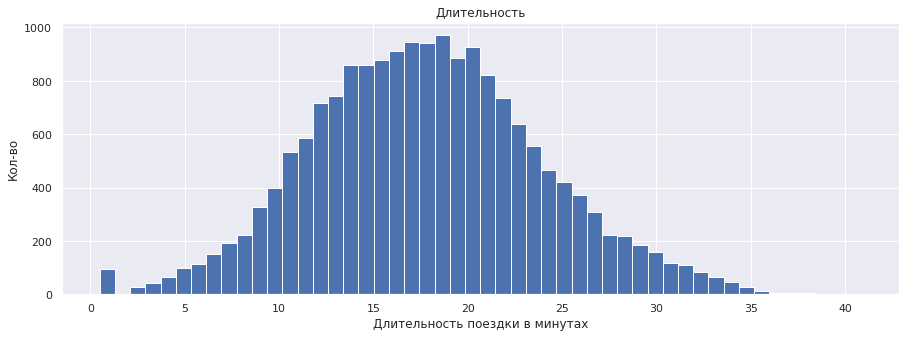

In [21]:
data_rider['duration'].hist(bins=50, figsize=(15,5))
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Кол-во')
plt.title('Длительность')
plt.show()

In [22]:
data_rider['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Вывод:
* Средняя продолжитлеьность поездки составляет 17 минут
* Минимальная поездка пол минуты
* Максимальное время поездки 41 минута
* В основном пользователи пользуется услугой в промежутке от 13 минут до 21 минуты

#### Общий вывод по иследовательскому анализу:
Сотношение пользователей примерно равно есть небольшие перекосы в сторону Пятигорска, Екатеринбурга, Краснодара. Наименьшее кол-во пользователей по отношению к другим городам это Москва.

Пользователи без подписки доминируют над пользователями с подпиской на 8%.


* Средний возраст пользователя составляет примерно 25 лет

* Минимальный возраст составил 12 лет

* Максимальный возраст сотсавил 43 года.

* Клиенты в возрасте от 22 лет до 28 лет являются ключейвой аудиторией сервса

* Среднее растояний каждой поездки составляет 3070м

* Минимальеная поездка меньше метра

* Максимальная 7211 метров
* Основная масса использует сервис на растоянии от 2543м до 3776м

* Средняя продолжитлеьность поездки составляет 17 минут
* Минимальная поездка пол минуты
* Максимальное время поездки 41 минута
* В основном пользователи пользуется услугой в промежутке от 13 минут до 21 минуты

### Шаг 4. Объединение данных

In [23]:
data_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [24]:
data_user = data_user.merge(data_rider,on='user_id')

In [25]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [26]:
data_user[data_user.duplicated ()].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

Вывод по обьединению: Кол-во строк в обьединенной таблице 18068, дубликаты отсутствуют.

In [27]:
data_free = data_user[data_user['subscription_type']=='free']
data_ultra = data_user[data_user['subscription_type']=='ultra']

Обьединняем два дата сета в один data_user, затем делим по признаку подписки, для проведения анализа 

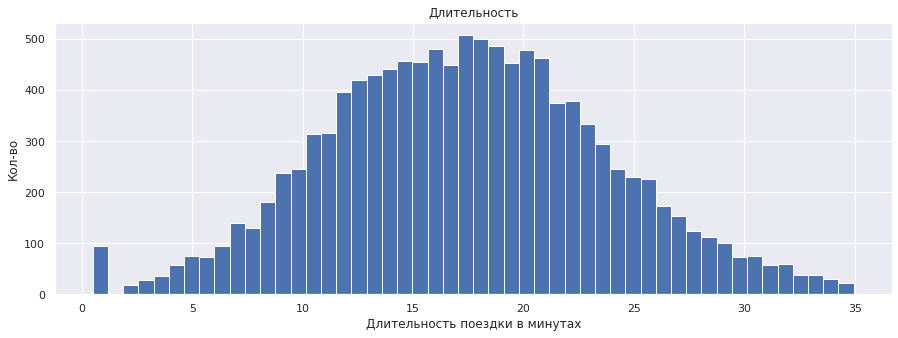

In [28]:
data_free['duration'].hist(bins=50, figsize=(15,5))
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Кол-во')
plt.title('Длительность')
plt.show()

In [29]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Вывод:
* Средняя длительность поездки у клиента без подписки составляет 17.3 минуты
* Минимальная длительнось 0.5 минуты
* Максимальная длительность 35 минут
* Большая часть поездок у клиентов без подписки составляют поездки с длительностью от 12 до 21 минуты

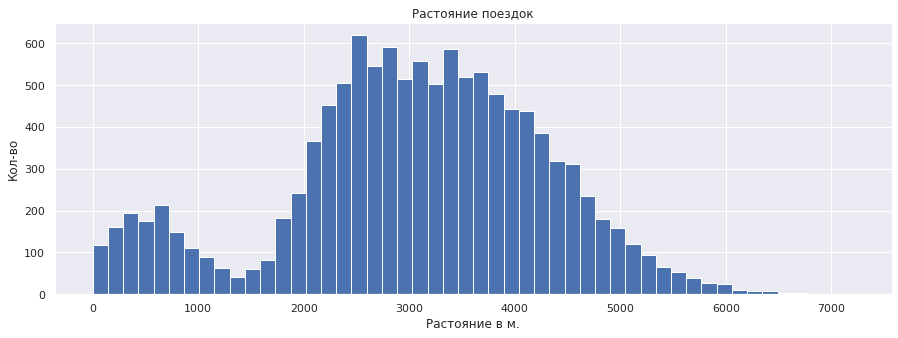

In [30]:
data_free['distance'].hist(bins=50, figsize=(15,5))
plt.xlabel('Растояние в м.')
plt.ylabel('Кол-во')
plt.title('Растояние поездок')
plt.show()

In [31]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Вывод:
* Средняя дистанция поездки у пользователя без подписки составляет 3045 метров
* Минимальная составляет 0.85 метра
* Максимальная 7211 метров
* Большая часть поездок у клиентов без подписки проходит на растояния в промежутке от 2366 до 3905 метров

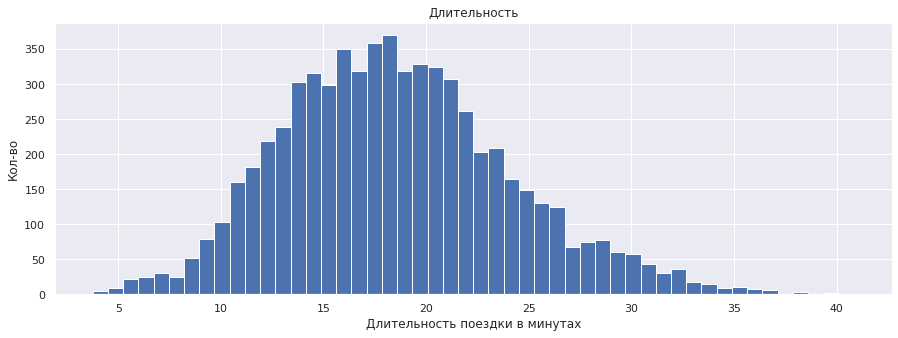

In [32]:
data_ultra['duration'].hist(bins=50, figsize=(15,5))
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Кол-во')
plt.title('Длительность')
plt.show()

In [33]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

* Средняя длительность поездки у клиента с подпиской составляет 18.5 минуты
* Минимальная длительнось 3.7 минуты
* Максимальная длительность 41 минуту
* Большая часть поездок у клиентов с подпиской составляют поездки с длительностью от 14 до 21 минуты

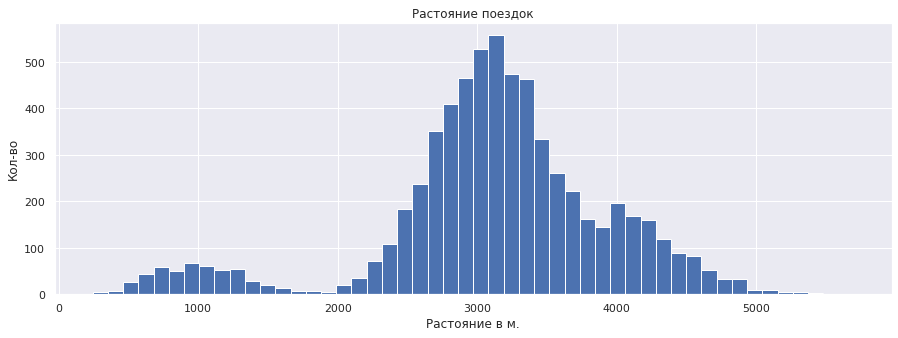

In [34]:
data_ultra['distance'].hist(bins=50, figsize=(15,5))
plt.xlabel('Растояние в м.')
plt.ylabel('Кол-во')
plt.title('Растояние поездок')
plt.show()

In [35]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Вывод:
* Средняя дистанция поездки у пользователя с подпиской составляет 3115 метров
* Минимальная составляет 244 метра
* Максимальная 5700 метров
* Большая часть поездок у клиентов с подпиской проходит на растояния в промежутке от 2785 до 3560 метров

#### Общий вывод:
Обьединняем два дата сета в один data_user, затем делим по признаку подписки, для проведения анализа
* Средняя длительность поездки у клиента без подписки составляет 17.3 минуты
* Минимальная длительнось 0.5 минуты
* Максимальная длительность 35 минут
* Средняя дистанция поездки у пользователя без подписки составляет 3045 метров
* Минимальная составляет 0.85 метра
* Максимальная 7211 метров


* Средняя длительность поездки у клиента с подпиской составляет 18.5 минуты
* Минимальная длительнось 3.7 минуты
* Максимальная длительность 41 минуту
* Средняя дистанция поездки у пользователя с подпиской составляет 3115 метров
* Минимальная составляет 244 метра
* Максимальная 5700 метров

### Шаг 5. Подсчёт выручки

In [36]:
data_all=data_user.pivot_table(index=('subscription_type','user_id','month'),
                     values =('distance','duration','city'),
                     aggfunc={'distance':sum,'duration':sum,'city':len})
data_all['duration'] = np.ceil(data_all['duration'])
data_all = data_all.rename(columns={'city':'quantity'})
data_all=data_all.reset_index()

In [37]:
data_all['profit'] = np.where(data_all['subscription_type'] == 'free',
                             (50*data_all['quantity'])+(8*data_all['duration']),
                             ((6*data_all['duration'])+199))

In [38]:
data_all.head(10)

,subscription_type,user_id,month,quantity,distance,duration,profit
0,free,700,1,1,2515.690719,15.0,170.0
1,free,700,2,5,13446.659764,86.0,938.0
2,free,700,3,1,3798.334905,19.0,202.0
3,free,700,4,1,2984.551206,16.0,178.0
4,free,700,6,2,5927.650988,29.0,332.0
5,free,700,7,2,4399.206279,21.0,268.0
6,free,700,8,1,4071.654669,17.0,186.0
7,free,700,10,2,6322.578618,43.0,444.0
8,free,700,11,3,8735.782625,32.0,406.0
9,free,701,1,1,2676.472894,18.0,194.0


In [39]:
print('Общее время всех поездок c подпиской: ',
      data_all.query('subscription_type == "ultra"')['duration'].sum().astype('int'),'минут')
print('Общее растояние всех поездок с подпиской: ',
      data_all.query('subscription_type == "ultra"')['distance'].sum().astype('int'),'метров')
print('Сумма общей выручки по клиентам с подпиской составляет: ',
      data_all.query('subscription_type == "ultra"')['profit'].sum().astype('int'),'рублей')
print('Средняя сумма выручки по клиентам с подпиской составляет: ',
      data_all.query('subscription_type == "ultra"')['profit'].mean().astype('int'),'рублей')

Общее время всех поездок c подпиской:  122755 минут
Общее растояние всех поездок с подпиской:  20250395 метров
Сумма общей выручки по клиентам с подпиской составляет:  1638597 рублей
Средняя сумма выручки по клиентам с подпиской составляет:  361 рублей


In [40]:
print('Общее время всех поездок без подписки: ',
      data_all.query('subscription_type == "free"')['duration'].sum().astype('int'),'минут')
print('Общее растояние всех поездок без подписки: ',
      data_all.query('subscription_type == "free"')['distance'].sum().astype('int'),'метров')
print('Сумма общей выручки по клиентам без подписки составляет: ',
      data_all.query('subscription_type == "free"')['profit'].sum().astype('int'),'рублей')
print('Средняя сумма выручки по клиентам без подписки составляет: ',
      data_all.query('subscription_type == "free"')['profit'].mean().astype('int'),'рублей')

Общее время всех поездок без подписки:  204585 минут
Общее растояние всех поездок без подписки:  35230289 метров
Сумма общей выручки по клиентам без подписки составляет:  2215080 рублей
Средняя сумма выручки по клиентам без подписки составляет:  325 рублей


 Считаем выручку для каждого клиента по месячно

In [41]:
(data_all.query('subscription_type == "ultra"').describe())

,user_id,month,quantity,distance,duration,profit
count,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000,4533.000000
mean,347.769910,6.427973,1.433929,4467.327382,27.080300,361.481800
std,200.433553,3.418698,0.696331,2353.168174,14.399994,86.399966
min,1.000000,1.000000,1.000000,244.210438,4.000000,223.000000
25%,174.000000,3.000000,1.000000,2981.762521,17.000000,301.000000
50%,348.000000,6.000000,1.000000,3572.518224,22.000000,331.000000
75%,523.000000,9.000000,2.000000,5883.378452,34.000000,403.000000
max,699.000000,12.000000,6.000000,20009.704886,124.000000,943.000000


In [42]:
(data_all.query('subscription_type == "free"').describe())

,user_id,month,quantity,distance,duration,profit
count,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000
mean,1119.990144,6.510591,1.701677,5182.449164,30.094881,325.842895
std,240.512508,3.460505,0.894871,3198.989334,17.478635,180.515646
min,700.000000,1.000000,1.000000,2.570787,1.000000,58.000000
25%,915.000000,4.000000,1.000000,2952.361137,18.000000,194.000000
50%,1120.000000,6.000000,1.000000,4324.635714,25.000000,268.000000
75%,1326.000000,9.000000,2.000000,6861.657086,40.000000,420.000000
max,1534.000000,12.000000,7.000000,23429.487786,141.000000,1428.000000


#### Общий вывод по выручке:
С подпиской:
* Кол-во поездок 4533
* Общее время всех поездок c подпиской:  122755 минут
* Общее растояние всех поездок с подпиской:  20250395 метров
* Сумма общей выручки по клиентам с подпиской составляет:  1638597 рублей
* Средняя сумма выручки по клиентам с подпиской составляет:  361 рублей

Без подписки:
* Кол-во поездок 6798
* Общее время всех поездок без подписки:  204585 минут
* Общее растояние всех поездок без подписки:  35230289 метров
* Сумма общей выручки по клиентам без подписки составляет:  2215080 рублей
* Средняя сумма выручки по клиентам без подписки составляет:  325 рублей


### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверка гипотезы о влияние подписки на время поездок:
- Нулевая гипотеза: Наличие подписки ни как не влияет на длительность поездок
- Алтернативаня гипотеза: Пользователи с подпиской тратят меньше времени.

In [43]:
alpha=0.05
result_one=st.ttest_ind(data_all.query('subscription_type == "ultra"')['duration'],
                        data_all.query('subscription_type == "free"')['duration'],
                        alternative = 'less')
print('Среднее значение длительности поездки без подписки',data_all.query('subscription_type == "free"')['duration'].mean())
print('Среднее значение длительности поездки с подпиской',data_all.query('subscription_type == "ultra"')['duration'].mean())
print('p-значение', result_one.pvalue)
print('Статистика t-testa', result_one.statistic)
if (result_one.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Среднее значение длительности поездки без подписки 30.094880847308033
Среднее значение длительности поездки с подпиской 27.080300022060445
p-значение 3.4611003532703337e-22
Статистика t-testa -9.634693426161272
Отвергаем нулевую гипотезу


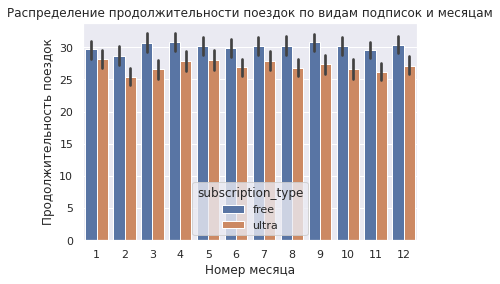

In [44]:
ax = sns.barplot(x='month',
            y='duration',
            hue='subscription_type',
            data=data_all)
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

Вывод: Отвергаем нулевую теорию о том что наличие подписки влияеет на продолжительность поездки.

Проверка односторонней гипотизы

 Расстояние одной поездки в 

3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 

3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза - растояние равно 3130м.

Альтернативаня - растояние превышает 3130м.

In [45]:
recommended_distance = 3130
alpha = 0.05
result_two = st.ttest_1samp(data_all.query('subscription_type == "ultra"')['distance'],
                      recommended_distance,
                      alternative='greater')
print('Средняя дистанция клиента с подпиской',data_all.query('subscription_type == "ultra"')['distance'].mean())
print('p-значение', result_two.pvalue)
print('Статистика t-testa', result_two.statistic)
if (result_two.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Средняя дистанция клиента с подпиской 4467.327381919405
p-значение 3.883541374011314e-278
Статистика t-testa 38.26287777473817
Отвергаем нулевую гипотезу


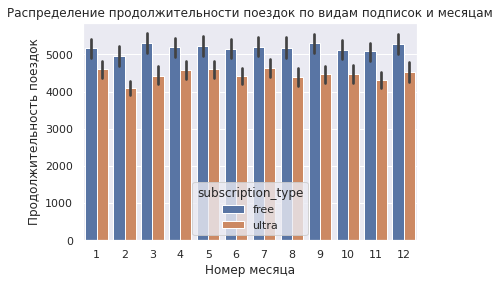

In [46]:
ax = sns.barplot(x='month',
            y='distance',
            hue='subscription_type',
            data=data_all)
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

Вывод: По итогу можем отвергнуть нулевую теорию

 Проверем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
 
 0-гипотеза доходы равны
 
 
 Альтернативная доход с подписки выше

In [47]:
alpha=0.05
result_one=st.ttest_ind(data_all.query('subscription_type == "ultra"')['profit'],
                      data_all.query('subscription_type == "free"')['profit'])

print('Средний доход с клиентов с подпиской',data_all.query('subscription_type == "ultra"')['profit'].mean())
print('Средний доход с клиентов без подписки',data_all.query('subscription_type == "free"')['profit'].mean())
print('p-значение', result_one.pvalue)
print('Статистика t-testa', result_one.statistic)
if (result_one.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Средний доход с клиентов с подпиской 361.48180013236265
Средний доход с клиентов без подписки 325.84289496910856
p-значение 5.626185237697457e-35
Статистика t-testa 12.380242460173289
Отвергаем нулевую гипотезу


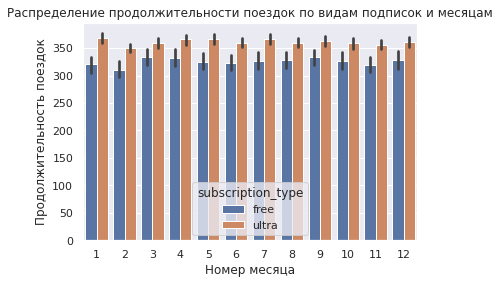

In [48]:
ax = sns.barplot(x ='month',
            y='profit',
            hue='subscription_type',
            data = data_all)
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

Вывод: Можем предположить что клиенты с подпиской приносят в средем болюшую прибыль, нежели клиенты без подписки.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Потребуется проверить гипотезу о раввенстве средних для зависимых выборок. метод:scipy.stats.ttest_rel()

### Общий вывод:

У нас в распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
- без подписки 
абонентская плата отсутствует;

стоимость одной минуты поездки — 8 рублей;

стоимость старта (начала поездки) — 50 рублей;


- с подпиской Ultra
абонентская плата — 199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.
 Описание данных

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

 Порядок действий:
* Загрузка данных
* Предобработка
* Иследовательский анализ
* Обьединенение данных
* Подсчет выручки
* Проверка Гипотез

Шаг 1. Загрузка данных
Загруженно 3 файла, пропуски не обнаружены, в одном из файлов необходимо сменить тип данных колонки дата.


Шаг 2. Предобработка данных
При проверки были обноружены дубликаты в дс data_user в обьеме 31 шт, в последующем были удалены.В колонка дата приведена в соответствие с нужным форматом.

Шаг 3. Исследовательский анализ данных
Сотношение пользователей примерно равно есть небольшие перекосы в сторону Пятигорска, Екатеринбурга, Краснодара. Наименьшее кол-во пользователей по отношению к другим городам это Москва.

Пользователи без подписки доминируют над пользователями с подпиской на 8%.

Средний возраст пользователя составляет примерно 25 лет

Минимальный возраст составил 12 лет

Максимальный возраст сотсавил 43 года.

Клиенты в возрасте от 22 лет до 28 лет являются ключейвой аудиторией сервса

Среднее растояний каждой поездки составляет 3070м

Минимальеная поездка меньше метра

Максимальная 7211 метров

Основная масса использует сервис на растоянии от 2543м до 3776м

Средняя продолжитлеьность поездки составляет 17 минут

Минимальная поездка пол минуты

Максимальное время поездки 41 минута

В основном пользователи пользуется услугой в промежутке от 13 минут до 21 минуты



Шаг 4. Объединение данных

Обьединняем два дата сета в один data_user, затем делим по признаку подписки, для проведения анализа

Средняя длительность поездки у клиента без подписки составляет 17.3 минуты
Минимальная длительнось 0.5 минуты
Максимальная длительность 35 минут
Средняя дистанция поездки у пользователя без подписки составляет 3045 метров
Минимальная составляет 0.85 метра
Максимальная 7211 метров
Средняя длительность поездки у клиента с подпиской составляет 18.5 минуты
Минимальная длительнось 3.7 минуты
Максимальная длительность 41 минуту
Средняя дистанция поездки у пользователя с подпиской составляет 3115 метров
Минимальная составляет 244 метра
Максимальная 5700 метров

Шаг 5. Подсчет выручки

С подпиской:

Кол-во поездок 4533
Общее время всех поездок c подпиской: 122755 минут
Общее растояние всех поездок с подпиской: 20250395 метров
Сумма общей выручки по клиентам с подпиской составляет: 1638597 рублей
Средняя сумма выручки по клиентам с подпиской составляет: 361 рублей


Без подписки:

Кол-во поездок 6798
Общее время всех поездок без подписки: 204585 минут
Общее растояние всех поездок без подписки: 35230289 метров
Сумма общей выручки по клиентам без подписки составляет: 2215080 рублей
Средняя сумма выручки по клиентам без подписки составляет: 325 рублей



Шаг 6. Проверка гипотез

1.Проверка гипотезы о влияние подписки на время поездок:

Нулевая гипотеза: Наличие подписки ни как не влияет на длительность поездок
Алтернативаня гипотеза: Пользователи с подпиской тратят меньше времени.

p-значение 3.4611003532703337e-22
Отвергаем нулевую гипотезу


2.Проверка гипотезы о растоянии:

Нулевая гипотеза - растояние поездки не превышает 3130м.

Альтернативаня - растояние превышает 3130м.
p-значение 3.883541374011314e-278
Отвергаем нулевую гипотезу

3.Проверем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

0-гипотеза доходы равны

Альтернативная доход с подписки выше

p-значение 5.626185237697457e-35
Отвергаем нулевую гипотезу


Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Потребуется проверить гипотезу о раввенстве средних для зависимых выборок. метод:scipy.stats.ttest_rel()


Рекомендации:
* Увеличить кол-во самокатов в Москве
* Предпринять меры по увеличению кол-ва подписчиков
